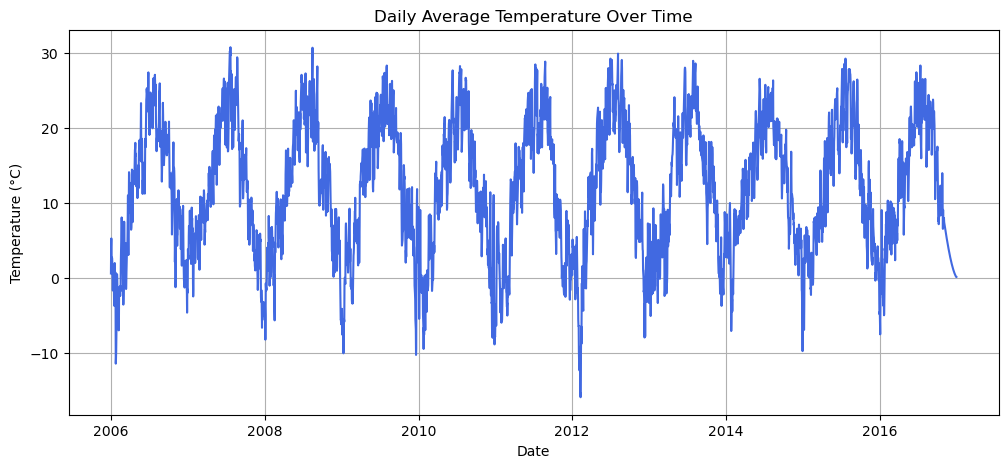

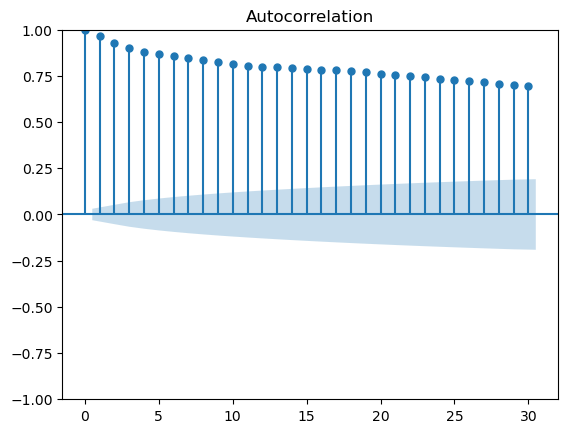

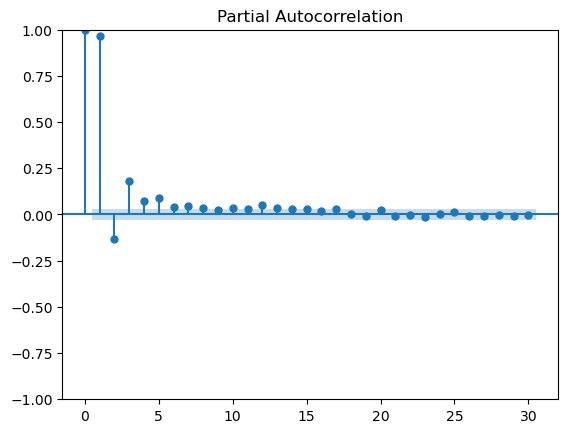

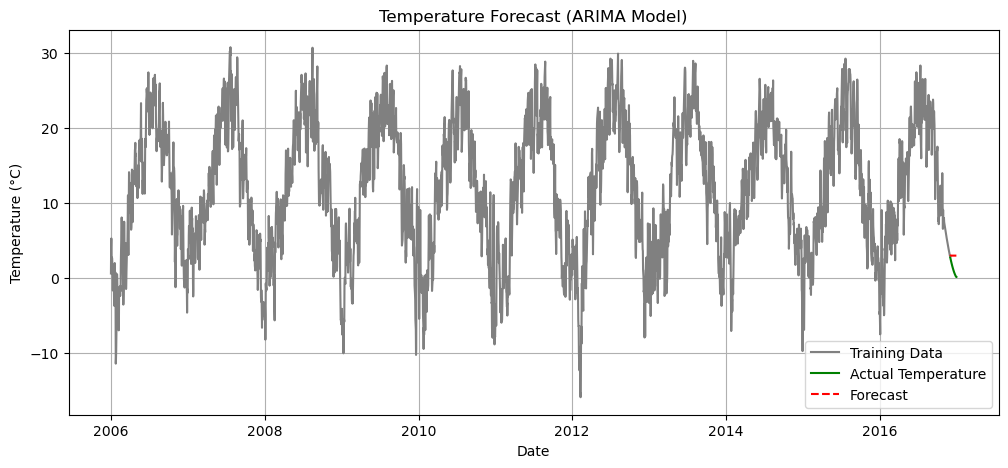

Mean Squared Error on Forecast: 3.80


In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Load and Prepare Dataset
df = pd.read_csv("weatherHistory.csv")
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.set_index('Formatted Date', inplace=True)

# Resample to daily average temperature
daily_temp = df['Temperature (C)'].resample('D').mean()
daily_temp = daily_temp.fillna(method='ffill')  # forward fill missing values

# Visualize the temperature trend
plt.figure(figsize=(12, 5))
plt.plot(daily_temp, color='royalblue')
plt.title("Daily Average Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

# ACF and PACF
plot_acf(daily_temp, lags=30)
plot_pacf(daily_temp, lags=30)
plt.show()

# Train-Test Split
train = daily_temp[:-30]
test = daily_temp[-30:]

# ARIMA Model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)
forecast.index = test.index  # align forecast with test set

# Plot Forecast
plt.figure(figsize=(12, 5))
plt.plot(train, label='Training Data', color='gray')
plt.plot(test, label='Actual Temperature', color='green')
plt.plot(forecast, label='Forecast', linestyle='--', color='red')
plt.title("Temperature Forecast (ARIMA Model)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error on Forecast: {mse:.2f}")
